# Ejercicio 7

Evaluate the Mann-Whitney U test for DIC and temperatura. Create boxplots and violin plots for these analyses

Vallat, R. (2018). Pingouin: statistics in Python. Journal of Open Source Software, 3(31), 1026
- https://pingouin-stats.org/build/html/index.html
- https://doi.org/10.21105/joss.01026

In [8]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [9]:
# Import the file
path= "C:\\Users\\ebert\\OneDrive - Universidad Autónoma del Carmen\\Curso de Ciencia de Datos\\Curso de Python\\Bases de datos\\Terminos_lagoon_TA_DIC_2023_RawData.csv"
df = import_csv(path)

In [10]:
print(df.columns)

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')


In [11]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(data1, data2, alpha=0.05):
    """
    Performs the Mann-Whitney U test and prints U statistic, p-value, and result.
    """
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    
    print(f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")

    if result.pvalue < alpha:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")

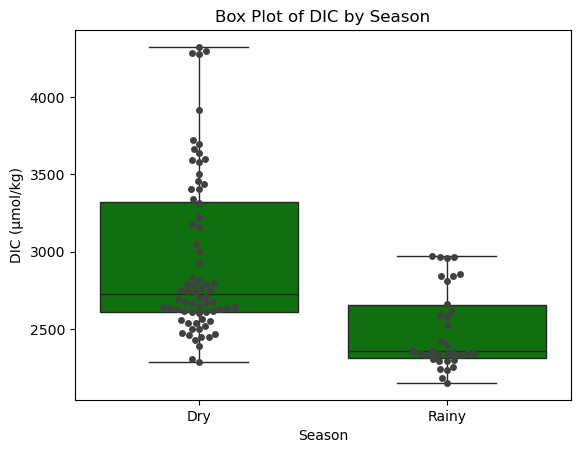

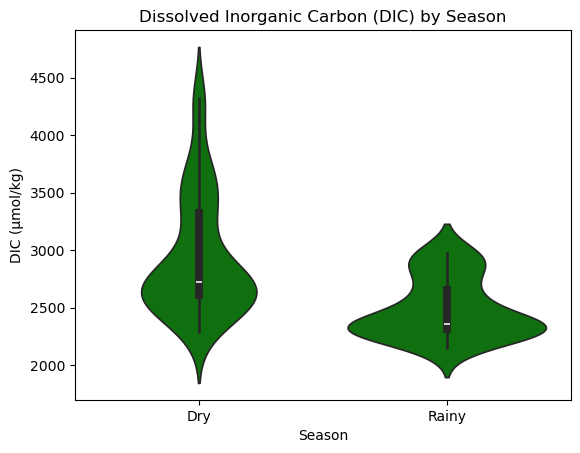

In [12]:
# Plot the box plot of DIC by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='dic_micromol_kg', data=df, color='green')
sns.swarmplot(x='season', y='dic_micromol_kg', data=df, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('DIC (μmol/kg)')
plt.title('Box Plot of DIC by Season')

# Show the plot
plt.show()


# Create a violin plot
sns.violinplot(x='season', y='dic_micromol_kg', data=df, color='green')

plt.title('Dissolved Inorganic Carbon (DIC) by Season')
plt.xlabel('Season')
plt.ylabel('DIC (μmol/kg)')
plt.show()


In [13]:
# Filter the TA data by season
dic_dry = df.loc[df["season"] == "Dry", "dic_micromol_kg"]
dic_rainy= df.loc[df["season"] == "Rainy", "dic_micromol_kg"]

# Perform the Mann-Whitney U test for TA between dry and rainy seasons
mann_whitney_test(dic_dry, dic_rainy)


U statistic = 1942.5
p-value = 1.1746695070093673e-06
The difference is statistically significant.


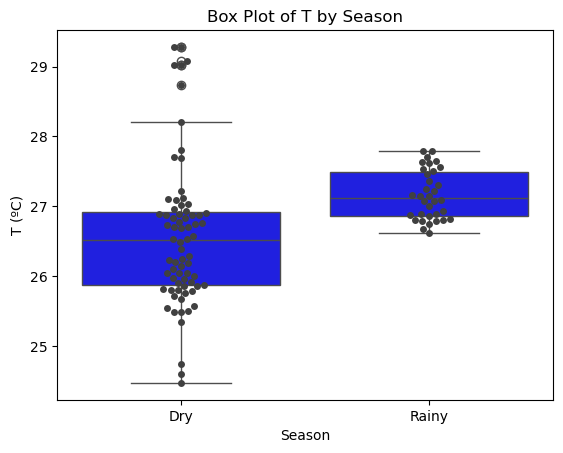

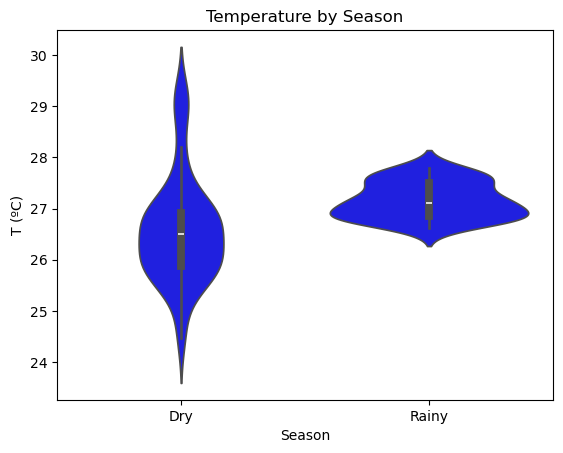

In [14]:
# Plot the box plot of T by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='temp_c', data=df, color='blue')
sns.swarmplot(x='season', y='temp_c', data=df, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('T (ºC)')
plt.title('Box Plot of T by Season')

# Show the plot
plt.show()

# Create a violin plot
sns.violinplot(x='season', y='temp_c', data=df, color='blue')

plt.title('Temperature by Season')
plt.xlabel('Season')
plt.ylabel('T (ºC)')
plt.show()

In [15]:
# Filter the TA data by season
t_dry = df.loc[df["season"] == "Dry", "temp_c"]
t_rainy= df.loc[df["season"] == "Rainy", "temp_c"]

# Perform the Mann-Whitney U test for TA between dry and rainy seasons
mann_whitney_test(t_dry, t_rainy)


U statistic = 551.0
p-value = 5.317160670684041e-06
The difference is statistically significant.
